In [1]:
#!/usr/bin/env python3
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
import csv
from numpy import pi as PI
import scienceplots
from matplotlib import animation
from matplotlib.animation import PillowWriter

#Saving outputs for the group:
#plt.style.use(['science', 'notebook', 'grid'])
FRAME = 58

In [90]:
class Plotter:

    def __init__(self):
        #CANVA BG COLOR: '#fbf6f1'
        plt.style.use(['science', 'notebook', 'grid'])
        plt.rcParams['figure.figsize'] = [10, 6]
        plt.rcParams['axes.facecolor'] = '#FFFAF5'
        plt.rcParams['savefig.facecolor']='#fbf6f1'
        

        

    def plotOutput(self, calculation, patientComparison=None, winters=None, stressComparison=None):
        plt.clf()
        fg, ax = plt.subplots(1,1)
        fg
        ax.set_title(calculation.title_long)
        ax.set_xlabel("Gait Cycle [%]")
        ax.set_ylabel("{} [{}]".format(calculation.title, calculation.units))
        ax.grid(axis='y')

        ax.plot(calculation.x, calculation.output, '-', lw=2.5, ms=2, color='#348ABD')
        self.callout(calculation=calculation)
        if patientComparison:
           ax.plot(calculation.x, patientComparison.output, '-', lw=2.5, ms=2, color='#A60628')

        if winters:
            ax.legend(['Healthy Patient',"Winter's Data"], fontsize=10, fancybox=False, edgecolor='black')
        elif stressComparison:
            ax.legend(['Bone w/ Implant', 'Bone w/o Implant'],fontsize=10, fancybox=False, edgecolor='black')
        elif patientComparison:
            ax.legend(['Healthy Patient','Injured Patient'], fontsize=10, fancybox=False, edgecolor='black')
        else:
            ax.legend(['Healthy Patient'], fontsize=10, fancybox=False, edgecolor='black')

        ax.set_ylim(calculation.ylim)
        ax.set_xlim(0, 100)
        plt.savefig(f"graphs/{calculation.title_long}", dpi=300)
        plt.show()

    def plotThreeOutput(self, calculation1, calculation2, calculation3, patientComparison=None, winters=None, stressComparison=None):
        plt.clf()
        fg, ax = plt.subplots(1,3)
        fg
        ax.set_title(calculation.title_long)
        ax.set_xlabel("Gait Cycle [%]")
        ax.set_ylabel("{} [{}]".format(calculation.title, calculation.units))
        ax.grid(axis='y')

        ax.plot(calculation.x, calculation.output, '-', lw=2.5, ms=2, color='#348ABD')
        self.callout(calculation=calculation)
        if patientComparison:
           ax.plot(calculation.x, patientComparison.output, '-', lw=2.5, ms=2, color='#A60628')

        if winters:
            ax.legend(['Healthy Patient',"Winter's Data"], fontsize=10, fancybox=False, edgecolor='black')
        elif stressComparison:
            ax.legend(['Bone w/ Implant', 'Bone w/o Implant'],fontsize=10, fancybox=False, edgecolor='black')
        elif patientComparison:
            ax.legend(['Healthy Patient','Injured Patient'], fontsize=10, fancybox=False, edgecolor='black')
        else:
            ax.legend(['Healthy Patient'], fontsize=10, fancybox=False, edgecolor='black')

        ax.set_ylim(calculation.ylim)
        ax.set_xlim(0, 100)
        plt.savefig(f"graphs/{calculation.title_long}", dpi=300)
        plt.show()

    def callout(self, calculation, ax=None):
        ymin, ymax = min(calculation.output), max(calculation.output)
        xpos_min, xpos_max = np.argmin(calculation.output), np.argmax(calculation.output)
        x_min, x_max = calculation.x[xpos_min], calculation.x[xpos_max]
        
        text_min = "Frame {:.0f}, {:.3f} {units}".format(xpos_min+1, ymin, units=calculation.units)
        text_max = "Frame {:.0f}, {:.3f} {units}".format(xpos_max+1, ymax, units=calculation.units)
        
        if not ax:
            ax=plt.gca()

        bbox_props = dict(facecolor='#FFFAF5', edgecolor='black')

        arrowprops=dict(
                arrowstyle="-|>",
                connectionstyle="angle,angleA=0,angleB=90",
                color='k')

        kw = dict(
                xycoords='data',
                textcoords="axes fraction",
                arrowprops=arrowprops,
                bbox=bbox_props,
                ha="right",
                va="top")

        plt.annotate(text_max, xy=(x_max, ymax), xytext=(0.4,0.94), **kw)
        plt.annotate(text_min, xy=(x_min, ymin), xytext=(0.75,0.06), **kw)

plotter = Plotter()
plotter

In [91]:
class Implant():

    def __init__(self):
        self.acetabulum = {
            'd': 53 #mm
        }
        self.cup = {
            'd': 54, #mm
            't': 54-43.68, #mm
            'v': 0.342,
            'E': 113800, #M/mm^2
            'material': 'Titanium Ti-6Al-4V'
        }

        self.liner = {
            'd': 43.58, #mm
            't': 43.58-36.05, #mm
            'E': 175000, #MPa
            'material': 'Zirconia',
            'v': 0.27,
        }

        self.head = {

            'd': 35.95,#mm
            'E': 175000, #N/mm^2
            'v': 0.27,
            'material': 'Zirconia'
        }

        self.neck = {
            'rLoad': np.array([20, 6]),
            't': 6, #mm
            'd': 12, #mm
            'yieldStrength': 970, #N/mm^2
            'E': 113800, #N/mm^2
            'material': 'Ti-6Al-4V'
        }

        self.stem = {
            'rLoad': np.array([66.704, -70.745]),
            't':15, #mm
            'dS':30, #mm
            'dM':15, #mm
            'b': 15,
            'h': 13.7,
            'yieldStrength': 970, #N/mm^2
            'material': 'PEEK',
            'dB': 30,
            'dC': 20,
            'Eb': 18.16, #GPa
            'Ec': 2.552, #GPa
            'Es': 4, #GPa
        }
        return

implant = Implant()
implant

In [92]:
class Calculation:
    def __init__(self, patient, implant=None, title=None, title_long=None, units=None, ylim=None):
        self.title = title
        self.title_long = title_long
        self.units = units
        self.ylim = ylim
        self.output = np.empty(0)
        self.x = np.arange(0,106)
        self.x = 100*self.x/105
        self.patient = patient
        self.implant = implant

In [93]:
class Patient:

    def __init__(self,winters_data,mass,height):

        #initialize patient properties
        self.mass = mass        #kg
        self.height = height    #m
        self.hipRx = []
        self.hipRy = []
        self.hipM = []

        #initialize dynamic analysis data to a dict
        self.dynamic = {}
        with open(winters_data, mode='r') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                frame = int(row['Frame'])
                del row['Frame']
                for key, value in row.items():
                    row[key] = float(value)
                self.dynamic[frame] = row

        #initialize Lengths, Masses, Weights
        self.L_foot = 0.152*self.height
        self.L_shank = (0.285-0.039)*self.height
        self.L_thigh = (0.53-0.285)*self.height
        self.m_foot = 0.0145*self.mass
        self.m_shank = 0.0465*self.mass
        self.m_thigh = 0.1*self.mass
        self.w_foot = self.m_foot*G
        self.w_shank = self.m_shank*G
        self.w_thigh = self.m_thigh*G
        
        for index in range(len(self.dynamic)):
            frame = index+1
            d = self.dynamic[frame] #d for data
            #geometry
            GRF_pos = [d["GroundCoFPX"],0]
            Ankle_pos = [d["AnkleX"]/100,d["AnkleY"]/100]
            Foot_CoM_pos = [d["FootCoMX"],d["FootCoMY"]]
            Knee_pos = [d["KneeX"]/100,d["KneeY"]/100]
            Leg_CoM_pos = [d["LegCoMX"],d["LegCoMY"]]
            Hip_pos = [d["HipX"]/100,d["HipY"]/100]
            Thigh_CoM_pos = [d["ThighCoMX"],d["ThighCoMY"]]
    
            #GRF = [100*d["GroundRX"]/56.7,100*d["GroundRY"]/56.7] # x100 /56.7 to normalize for the patient weight
            #GRF = np.array([(100/56.7)*d["GroundRX"], (100/56.7)*d["GroundRY"]])
            GRF = np.array([(mass/56.7)*d["GroundRX"],(mass/56.7)*d["GroundRY"]])
    
            #ankle frame
            F_ankle = [self.m_foot*d["FootAX"], self.m_foot*d["FootAY"]] - GRF - [0,self.w_foot]
            I_foot = ((0.475*self.L_foot)**2)*self.m_foot
            r_af = np.subtract(Ankle_pos,Foot_CoM_pos)
            r_gf = np.subtract(GRF_pos,Foot_CoM_pos)
            M_ankle = d["FootAA"]*I_foot - np.cross(r_af, F_ankle) - np.cross(r_gf, GRF)
            #WRONG
            
            #leg frame
            F_ankle = F_ankle*-1
            M_ankle = M_ankle*-1
    
            F_knee = [self.m_shank*d["LegAX"], self.m_shank*d["LegAY"]] - F_ankle - [0,self.w_shank] #good
            I_shank = ((0.302*self.L_shank)**2)*self.m_shank
            r_al = np.subtract(Ankle_pos,Leg_CoM_pos)
            r_kl = np.subtract(Knee_pos,Leg_CoM_pos)
            M_knee = d["LegAA"]*I_shank - np.cross(r_al, F_ankle) - np.cross(r_kl, F_knee) - M_ankle
            
            #thigh frame
            F_knee = F_knee*-1 #good
            M_knee = M_knee*-1 #good
    
            F_hip = [self.m_thigh*d["ThighAX"], self.m_thigh*d["ThighAY"]] - F_knee - [0, self.w_thigh]
            I_thigh = ((0.323*self.L_thigh)**2)*self.m_thigh #good
            #M_hip = d["ThighAA"]*I_thigh - np.cross(np.subtract(Knee_pos,Thigh_CoM_pos),F_knee) - np.cross(np.subtract(Hip_pos,Thigh_CoM_pos),F_hip) - M_knee
            M_hip = d["ThighAA"]*I_thigh - np.cross(np.subtract(Knee_pos,Thigh_CoM_pos),F_knee) - np.cross(np.subtract(Hip_pos,Thigh_CoM_pos),F_hip) - M_knee
            self.hipRx.append(F_hip[0])
            self.hipRy.append(F_hip[1])
            self.hipM.append(M_hip)

        self.hipRx = np.array(self.hipRx)
        self.hipRy = np.array(self.hipRy)
        self.hipM = np.array(self.hipM)
        self.hipResultant = (self.hipRx**2 + self.hipRy**2)**(1/2)

In [94]:
G = -9.81

#WINTERS TEST DATA
#patientMass = 56.7
#patientHeight = 1.73

#OUR PATIENT
patientMass = 100
patientHeight = 1.65645

healthyElder = Patient(
        mass=patientMass,
        height=patientHeight,
        winters_data='data_healthy.csv')

-8.17849139344501 -5.2178775090179155


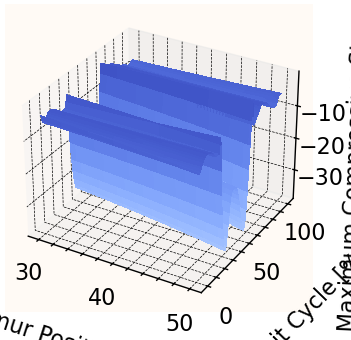

In [111]:
# bone length study
num = 106

percentGait = np.arange(0,num)
percentGait = 100*percentGait/105
percentBone = np.linspace(30, 50, num=num)
percentBone, percentGait= np.meshgrid(percentBone, percentGait, indexing='ij')

outputImplant = [[-1 for i in range(num)] for j in range(num)]
outputNoImplant = [[-1 for i in range(num)] for j in range(num)]
    
#geometry
boneOD = np.linspace(29.80, 27.43, num=num)
boneT = np.linspace(15.1, 10.41, num=num)
boneID = boneOD - boneT
stemH = 13.7
stemB = np.linspace(15, 10, num=num)
yDist = np.linspace(0, 54.5, num=num)


#defaults
stem = implant.stem

for i in range(len(percentGait)):

    theta = np.radians(-8)
    #USE KNEE AND HIP POS TO DERIVE EXP FOR THETA_ABD
    rotationMatrix = np.array([[np.cos(theta), -np.sin(theta)],
                               [np.sin(theta), np.cos(theta)]])
    stemLoad = np.dot(rotationMatrix, np.vstack((-1*healthyElder.hipRx, healthyElder.hipRy)))
    
    A = (PI/4)*(boneOD[i]**2 - boneID[i]**2)
    I = (1/64)*(boneOD[i]**4 - boneID[i]**4)
    
    [tau, sigmaAxial] = stemLoad/A

    stemLoad = np.vstack(stemLoad).T
    rLoad = stem['rLoad'] + [0,yDist[i]]
    M = 0 - np.cross(rLoad/1000, stemLoad)
    #again not including the hip reaction momemt on Prof's advice
    #otherwise, this matches up with the calcs in the document
    
    # x1000 to convert Nm to Nmm
    sigmaBending = 1000*M*(boneOD[i]/2)/I

    sigmaMaxBending = sigmaAxial - abs(sigmaBending)
    
    outputNoImplant[i] = sigmaMaxBending

    Ab = (PI/4)*(boneOD[i]**2-boneID[i]**2)
    As = stemB[i]*stemH
    Ac = (PI/4)*boneID[i]**2 - As
    
    Ib = (PI/64)*(boneOD[i]**4 - boneID[i]**4)
    Is = stemB[i]*stemH**3/12
    Ic = (PI/64)*boneID[i]**4 - Is
    

          
    _, sigmaBoneAxialImplant = stem['Eb']*stemLoad.T / ( stem['Eb']*Ab + stem['Ec']*Ac + stem['Es']*As )
    sigmaBoneBendingImplant = 1000*stem['Eb']*M*(boneOD[i]/2) / ( stem['Eb']*Ib + stem['Ec']*Ic + stem['Es']*Is )
    sigmaBoneMaxImplant = sigmaBoneAxialImplant - abs(sigmaBoneBendingImplant)

    outputImplant[i] = sigmaBoneMaxImplant

    _, sigmaCementAxialImplant = stem['Ec']*stemLoad.T / ( stem['Eb']*Ab + stem['Ec']*Ac + stem['Es']*As )
    sigmaCementBendingImplant = 1000*stem['Ec']*M*(boneOD[i]/2) / ( stem['Eb']*Ib + stem['Ec']*Ic + stem['Es']*Is )
    sigmaCementMaxImplant = sigmaCementAxialImplant - abs(sigmaCementBendingImplant)

    _, sigmaStemAxialImplant = stem['Es']*stemLoad.T / ( stem['Eb']*Ab + stem['Ec']*Ac + stem['Es']*As )
    sigmaStemBendingImplant = 1000*stem['Es']*M*(boneOD[i]/2) / ( stem['Eb']*Ib + stem['Ec']*Ic + stem['Es']*Is )
    sigmaStemMaxImplant = sigmaStemAxialImplant - abs(sigmaStemBendingImplant)

    if (i == 105):
        print(sigmaStemMaxImplant[37], sigmaCementMaxImplant[37])
outputImplant = np.array(outputImplant)
outputNoImplant = np.array(outputNoImplant)

fg, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=[12,4])
ax.plot_surface(percentBone, percentGait, outputImplant, cmap='coolwarm_r',vmin=-117.76, vmax=0, antialiased=False, rstride=1, cstride=1, fc='black')


ax.set_xlabel('Femur Position [mm]', labelpad=20)
ax.set_ylabel('Gait Cycle [%]', labelpad=20)
ax.set_zlabel('Maximum Compressive Stress [MPa]', labelpad=6)

def animate(i):
    ax.view_init(elev=10, azim=1*i)
#ax.view_init(elev=10, azim=0)
#ani = animation.FuncAnimation(fg, animate, frames=360, interval=50)
#ani.save('graphs/ani1.gif', writer='pillow', fps=30, dpi=100)
plt.show()

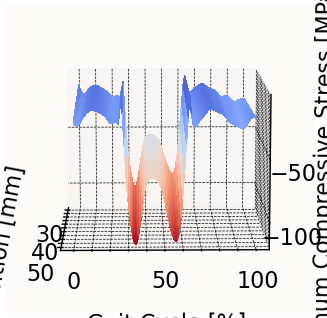

done


In [96]:
fg, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=[12,4])
ax.plot_surface(percentBone,percentGait, outputNoImplant,vmin=-117.76, vmax=0, cmap='coolwarm_r', antialiased=False, rstride=1, cstride=1, fc='black')

ax.set_xlabel('Femur Position [mm]', labelpad=20)
ax.set_ylabel('Gait Cycle [%]', labelpad=20)
ax.set_zlabel('Maximum Compressive Stress [MPa]', labelpad=6)
#ax.pcolormesh(percentGait, percentBone, outputNoImplant, vmin=-1., vmax=1., cmap='RdBu_r')

def animate(i):
    ax.view_init(elev=10, azim=1*i)
#ax.view_init(elev=10, azim=0)
#ani = animation.FuncAnimation(fg, animate, frames=360, interval=50)
#ani.save('graphs/ani2.gif', writer='pillow', fps=30, dpi=100)

plt.show()

<Figure size 1000x600 with 0 Axes>

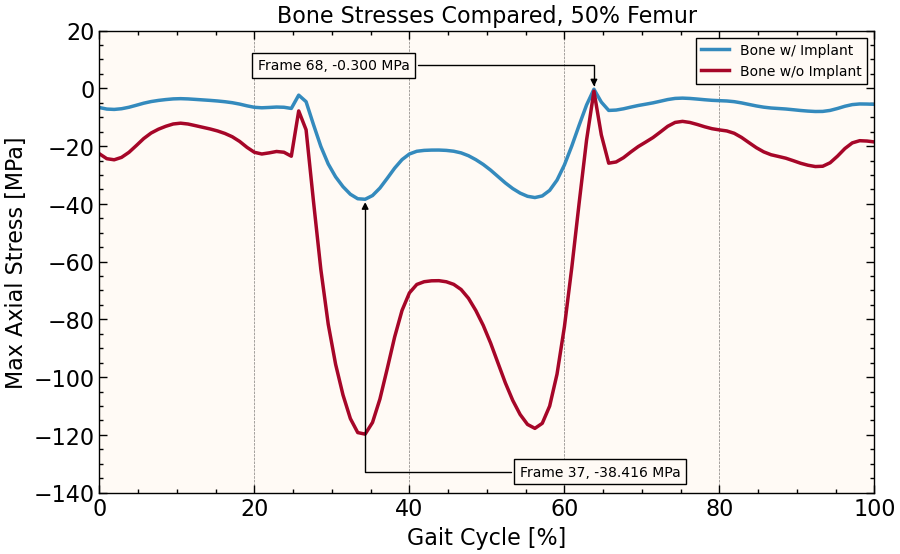

In [106]:
implantStresses =Calculation(
        patient=healthyElder,
        implant=implant,
        title = "Max Axial Stress",
        title_long = "Bone Stresses Compared, 50% Femur",
        units = "MPa",
        ylim = [-140,20])
stemStresses = Calculation(
        patient=healthyElder,
        implant=implant,
        title = "σ",
        title_long = "Maximum Compressive Stress on the Femoral Stem",
        units = "MPa",
        ylim = [-115,20])
stemStresses.output = outputNoImplant[105]
implantStresses.output = outputImplant[105]
plotter.plotOutput(calculation=implantStresses, patientComparison=stemStresses, stressComparison=True)